In [3]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model('model2.h5')
from PIL import ImageTk, Image, ImageDraw
import PIL
import mahotas
from PIL import ImageGrab, Image
from tkinter import *
import tkinter as tk
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

1/1 [==============================] - 0s 93ms/step


2023-06-08 14:20:14.626295: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 9ms/step


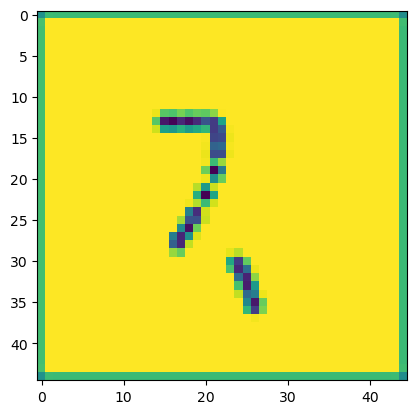

In [5]:

def predict_digit(i):
    i = i.convert('L')
    i = i.resize((45,45))
    plt.imshow(i)
    ia = tf.keras.utils.img_to_array(i)
    ia = np.array([ia])
    #predicting the class
    r = model.predict(ia)
    s = tf.nn.softmax(r[0])
    return class_names[np.argmax(s)],  np.max(s)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        x, y = (self.canvas.winfo_rootx(), self.canvas.winfo_rooty())
        width, height = (self.canvas.winfo_width(), 
                         self.canvas.winfo_height())
        a, b, c, d = (x, y, x+width, y+height)
        im = ImageGrab.grab(bbox=(a,b,c,d))
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=6.667
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

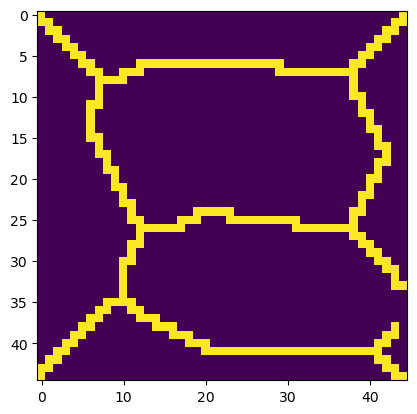

In [13]:
img_path = 'user_input.png'
img = cv2.imread(img_path,cv2.IMREAD_ANYCOLOR)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
new_img = mahotas.thin(gray)
plt.imshow(new_img)